In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
import numpy as np

import time

from models import Model1, Model2, Model3, Mnist_Conv, Cifar10_Conv1, Cifar10_Conv2
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to [0, 1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

# Reshape the data to fit the model input
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

# Define a simple feedforward neural network model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32,  (3, 3), input_shape=(32, 32, 3)),
        layers.ReLU(),
        layers.Conv2D(32,  (3, 3)),
        layers.ReLU(),
        layers.Conv2D(64,  (3, 3), strides=2),
        layers.ReLU(),
        # layers.Conv2D(64, (3, 3)), layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64,  (3, 3)),
        layers.ReLU(),
        layers.Conv2D(128, (3, 3)),
        layers.ReLU(),
        layers.Conv2D(128, (3, 3)),
        layers.ReLU(),
        layers.Conv2D(256, (3, 3)),
        layers.ReLU(),
        layers.Conv2D(256, (3, 3)),
        layers.ReLU(),
        layers.Conv2D(10,  (3, 3)),
        layers.Flatten(),
        layers.Softmax(),
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# model = create_model()
# model = Model2()
model = Cifar10_Conv2()
model.summary()


Training images shape: (50000, 32, 32, 3, 1)
Test images shape: (10000, 32, 32, 3, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 192)    │       166,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 192)    │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 192)      │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 6, 6, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 10)       │         1,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 10)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,369,738 (5.23 MB)

 Trainable params: 1,369,738 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model
# history = model.fit(train_images, train_labels, epochs=3, batch_size=64, validation_split=0.1)
# model.save(f"Cifar10_Conv2D_e3_b64.h5")

In [4]:
model = tf.keras.models.load_model("cifar10_conv2d_allconv.h5")

In [5]:
# Define sigmoid activation function
def sigmoid(beta, x):
    # return 1 / (tf.exp(-1*beta*x) + 1)
    return tf.keras.ops.sigmoid(beta*x)

# Define tanh activation function
def tanh(beta, x):
    # return (tf.exp(beta*x) - tf.exp(-1*beta*x)) / (tf.exp(beta*x) + tf.exp(-1*beta*x))
    return tf.keras.ops.tanh(beta*x)

In [6]:
def check_nan(x, msg):
    if isinstance(x, tf.Tensor):
        x = tf.convert_to_tensor(x)
    is_nan = tf.math.is_nan(x)
    # if is_nan
    has_nan = tf.reduce_any(is_nan)
    if has_nan:
        print(f"Tensor has NaN: {tf.get_static_value(has_nan)} ({msg})")
        
    return has_nan

In [7]:
def get_activation_sparsity(model, inputs, func: callable, beta: int=1):
    # Get activation outputs
    activation_layers = [layer.output for layer in model.layers if 're_lu' in layer.name]
    
    # Get activation values for input
    activation_model = tf.keras.Model(inputs=model.inputs, outputs=activation_layers)
    activations = activation_model(inputs)
    sparsity_function_applied = map(lambda x: func(beta, x), activations)
    sum_act_by_layers = list(map(tf.reduce_sum, sparsity_function_applied))
    estimate = tf.reduce_sum(sum_act_by_layers)
    num_neurons = sum(list(map(lambda x: x.shape.num_elements(), activations)))
    
    activation_sparsity = -1 * estimate / num_neurons
    
    return activation_sparsity

In [8]:
def get_cross_entropy(pre_softmax_x_adv, pre_softmax_x_clean):
    y = tf.math.argmax(pre_softmax_x_clean, axis=1)[0]
    nominator = tf.reduce_sum(tf.math.exp(pre_softmax_x_adv))
    demoniator = tf.math.exp(pre_softmax_x_adv[0][y])
    cross_entropy = nominator / demoniator
    return -1 * tf.math.log(cross_entropy)

![algorhtim 1](resources/algorithm1.png)

In [9]:
#Algorithm 1

# x_clean(clean input), f(DNN model), L_sparsity and L_ce (Objective function terms)
# epsilon (Maximum L2 distortion), epsilon_iter (L2 distortion per iteration),
# O_max and I_max (Maximum outer and inner-loop iterations),
# c_in, c_min and c_max (Initial, min, and max value of trade-off constant)

def algorithm_1(model, x_clean, c_in, c_max, c_min, O_max, I_max, mu, epsilon, sparsity_function, beta):
    # Get pre softmax values for input
    pre_softmax_out = model.layers[-1].output
    model_prime = tf.keras.Model(inputs=model.inputs, outputs=pre_softmax_out)
    y_clean = model_prime(x_clean)
    c, o, x = c_in, 0, 0

    while o < O_max:
        x = tf.convert_to_tensor(x_clean)
        i, g = 0, 0
        while i < I_max:
            with tf.GradientTape() as tape:
                tape.watch(x)
                prediction = model_prime(x)
                Lsparsity = get_activation_sparsity(model, x, sparsity_function, beta)
                Lce = get_cross_entropy(prediction, y_clean)
                loss = Lsparsity + c * Lce
            gradient = tape.gradient(loss, x)
            g  = mu*g + gradient
            x += -1*epsilon*g/tf.norm(g)
            x  = tf.clip_by_value(x, 0, 1) #, epsilon, x_clean)
            i += 1

        y_clean_prime = tf.math.argmax(y_clean, axis=1)
        y_adv_prime = tf.math.argmax(model_prime(x), axis=1)
        
        if y_clean_prime != y_adv_prime:
             c = (c + c_max)/2
        else:
             c = (c + c_min)/2
        o += 1

    return x

In [41]:
from tqdm import tqdm
epsilon_iter = 0.01
epsilon = 0.9
I_max = 100
# beta = 20
O_max = 1
c_in = 0.5
c_min = 0
c_max = 1
mu = 0.9
# for x_clean in train_images[0:1]:

x_clean = train_images[0:1]
beta_range = list(range(0, 22, 2))

def run_test(sparsity_function):
    act_sps = []
    for beta in tqdm(beta_range):
        x_adv = algorithm_1(model, x_clean, c_in, c_max, c_min, O_max, I_max, mu, epsilon, sparsity_function, beta)
        sp_clean = get_activation_sparsity(model, x_clean, sparsity_function, beta)
        sp_adv = get_activation_sparsity(model, x_adv, sparsity_function, beta)
        if sp_clean == 0:
            act_sps.append(1)
        else:
            act_sps.append(sp_adv/sp_clean)
    return act_sps

dec_in_tanh_act_sp = run_test(tanh)
dec_in_sigmoid_act_sp = run_test(sigmoid)



  0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 11/11 [01:45<00:00,  9.62s/it]


In [37]:
import tensorflow as tf

def write_tensor_list(tensor_list, filename):
    with tf.io.TFRecordWriter(filename) as writer:
        for tensor in tensor_list:
            serialized_tensor = tf.io.serialize_tensor(tensor)
            writer.write(serialized_tensor.numpy())

def read_tensor_list(filename):
    records = tf.data.TFRecordDataset(filename)
    return [tf.io.parse_tensor(record, tf.float32) for record in records]

In [29]:
write_tensor_list(dec_in_tanh_act_sp, "dec_in_tanh_act_sp.tfrecord")
write_tensor_list(dec_in_sigmoid_act_sp, "dec_in_sigmoid_act_sp.tfrecord")

In [38]:
test_tanh = read_tensor_list("dec_in_tanh_act_sp.tfrecord")
test_sigmoid = read_tensor_list("dec_in_sigmoid_act_sp.tfrecord")

InvalidArgumentError: {{function_node __wrapped__ParseTensor_device_/job:localhost/replica:0/task:0/device:CPU:0}} Type mismatch between parsed tensor (float) and dtype (int32) [Op:ParseTensor] name: 

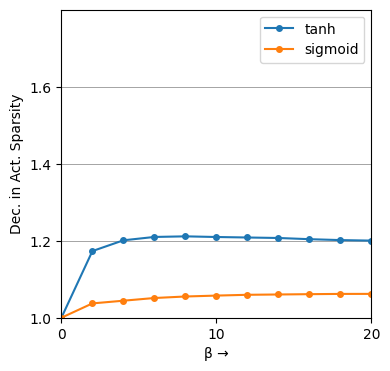

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
plt.plot(beta_range, test_tanh, label='tanh', marker="o", markersize=4)
plt.plot(beta_range, test_sigmoid, label='sigmoid', marker="o", markersize=4)
plt.yticks([1, 1.2, 1.4, 1.6])
plt.ylim((1, 1.8))
plt.xlim((0, 20))
plt.xticks([0, 10, 20])
plt.axhline(y=1.2, color='gray', linewidth=0.5, zorder=0)
plt.axhline(y=1.4, color='gray', linewidth=0.5, zorder=0)
plt.axhline(y=1.6, color='gray', linewidth=0.5, zorder=0)

plt.locator_params(axis='y', nbins=4)
plt.xlabel('\u03B2 \u2192') #beta , right arrow
plt.ylabel('Dec. in Act. Sparsity')
plt.legend()
plt.savefig("output.png")
plt.show()


| ![my_output](../output.png) | ![paper_output](../paper_output.png) |
|:---:|:---:|
| Test result | Paper result |